In [1]:
# CIFAR 10 DATASETS LABEL AND INXED 

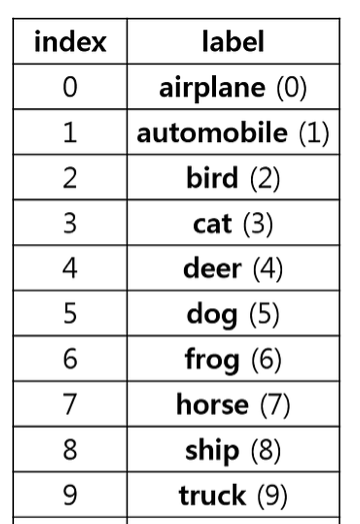

#### STEP 1: IMPORT NECESSARY LIBRARIES AND DATASETS

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
#  importing datasets
from keras.datasets import cifar10

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

#### STEP 2: VISUALIZATION DATASETS

[8]


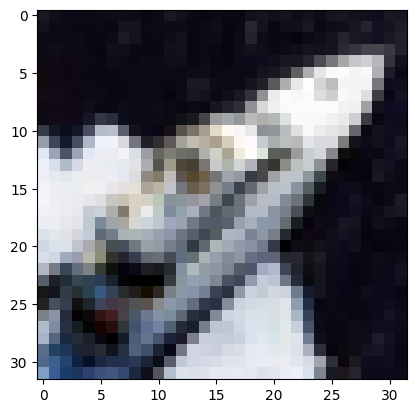

In [10]:
i = 20000
plt.imshow(X_train[i])
print(y_train[i])

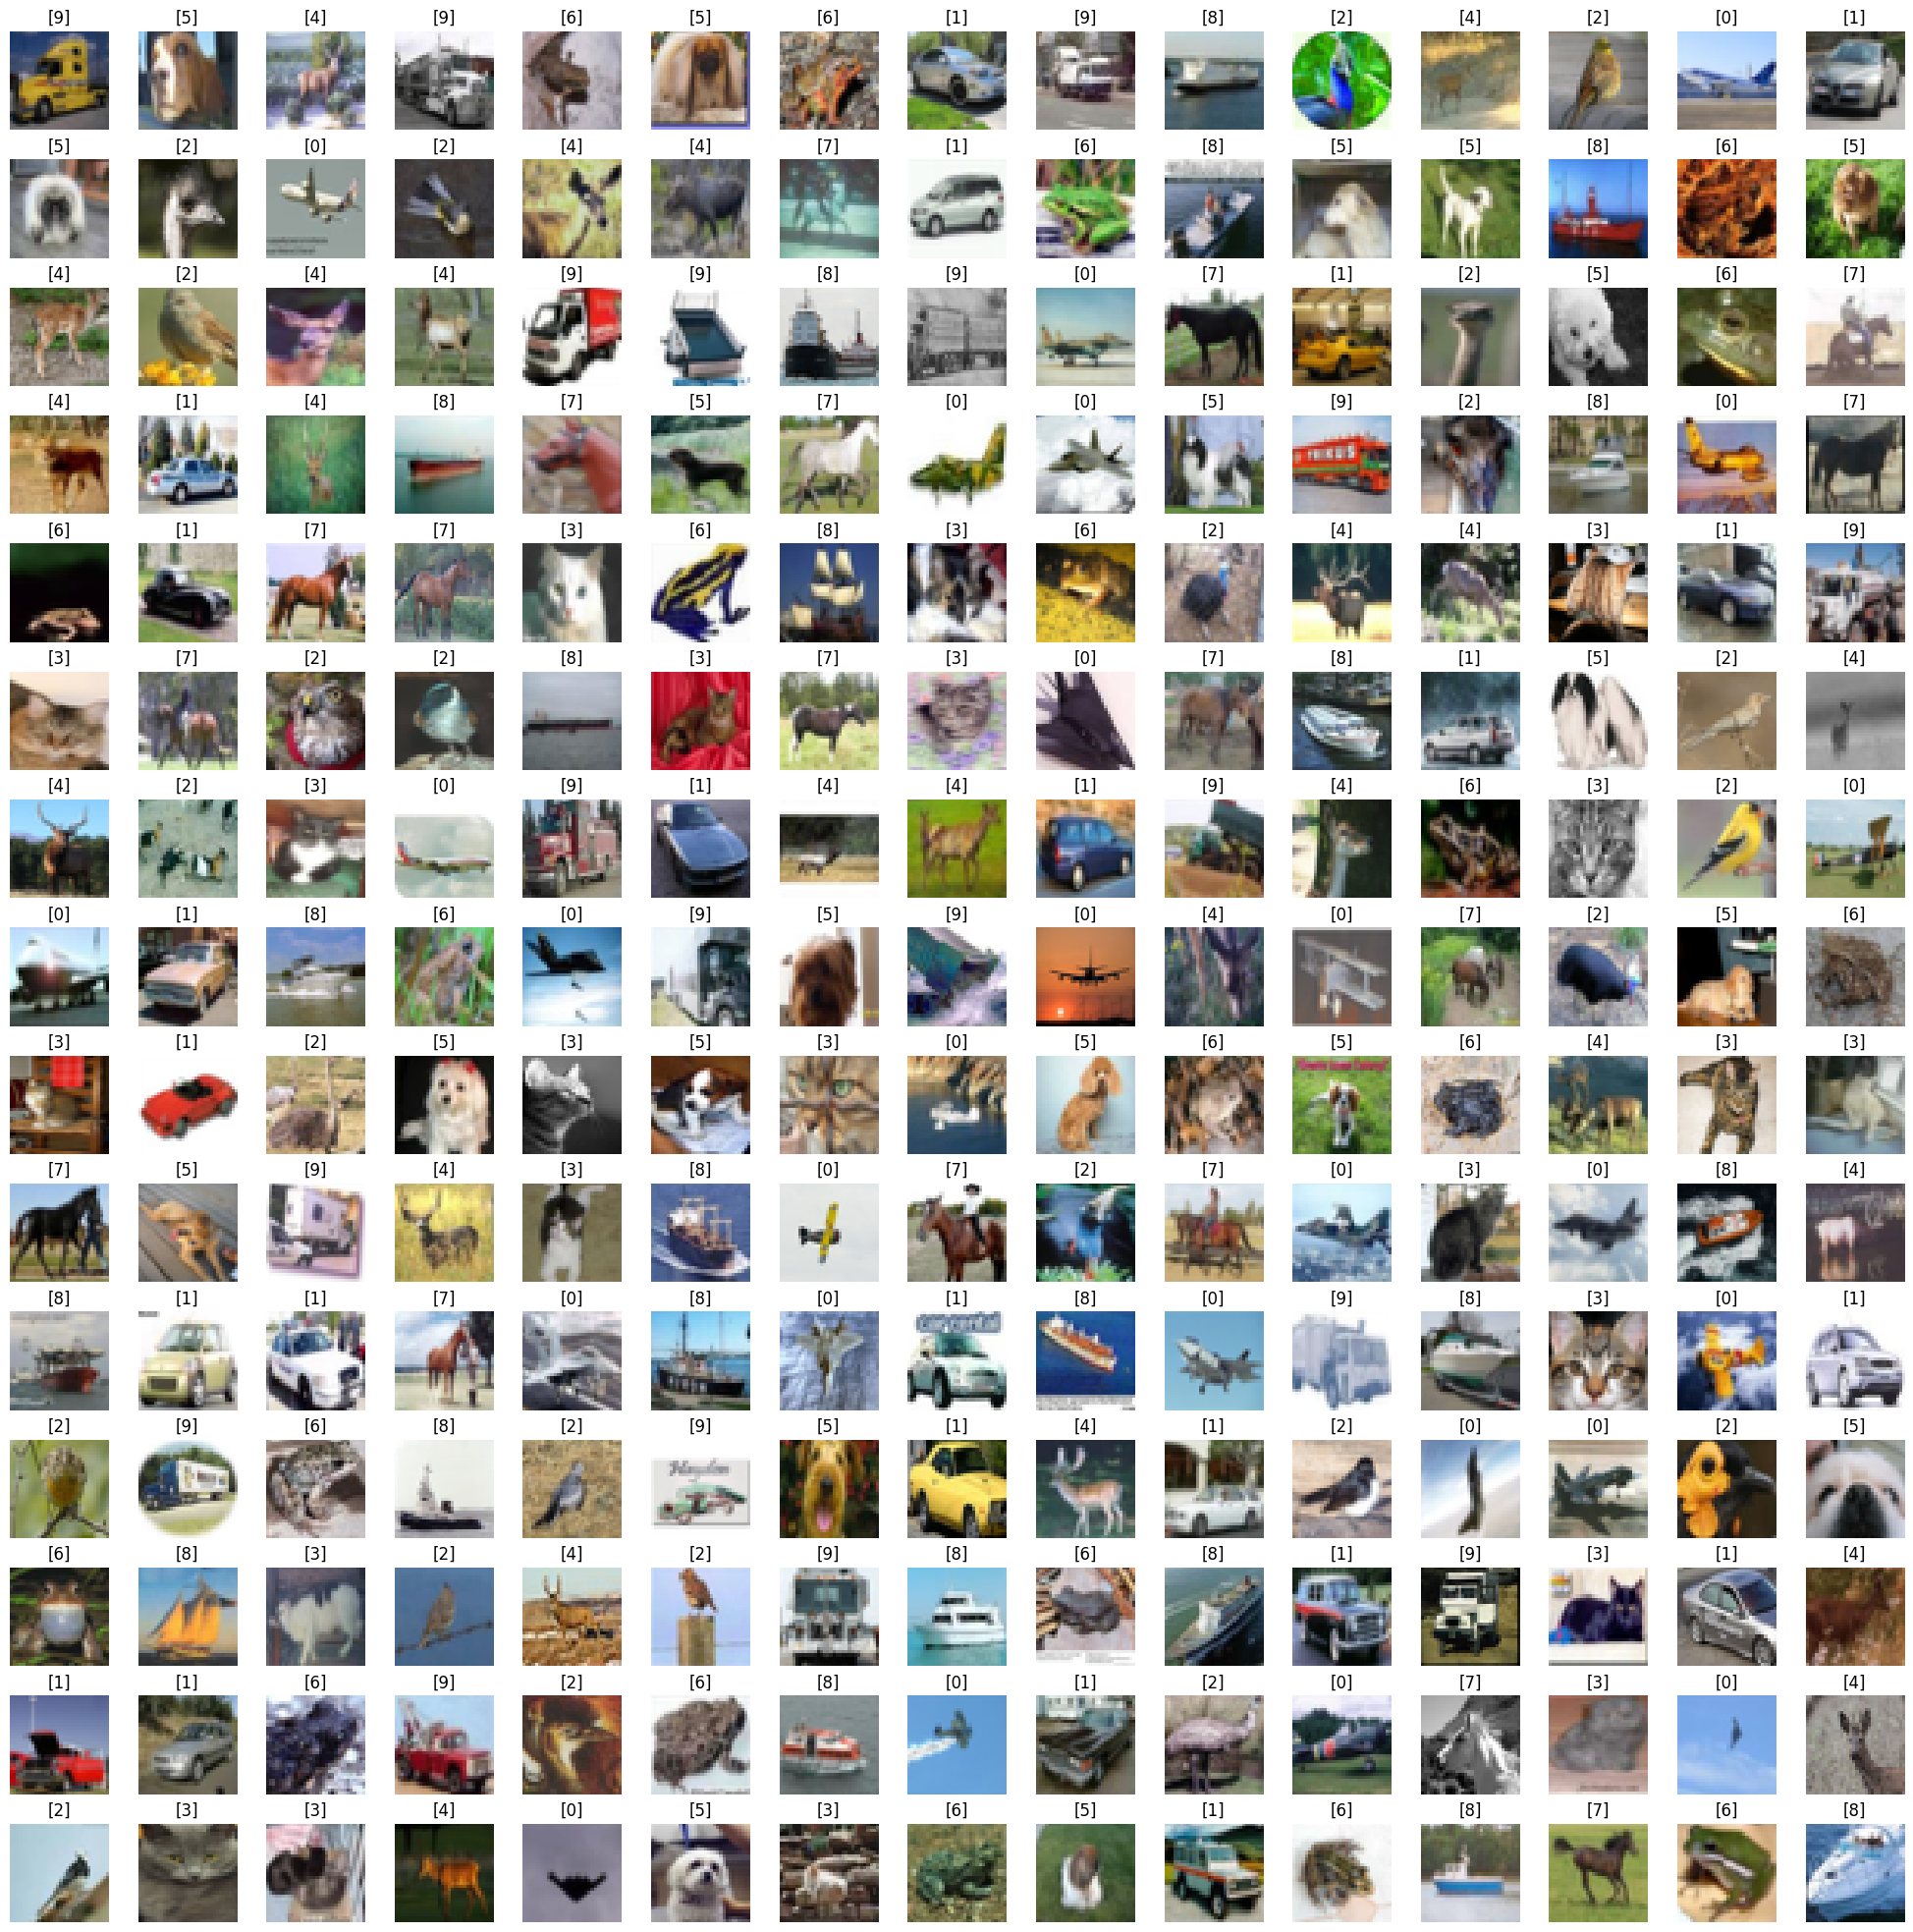

In [11]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel() # flattening image 


n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # picking random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.3)


In [12]:
n_training

50000

#### STEP 3: DATA PREPERATION

In [14]:
# converting X_train, X_test into float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
number_catogries = 10 

In [16]:
# conerting y_train and y_test into categorial/binary form 
import keras

y_train = keras.utils.to_categorical(y_train, number_catogries)
y_test = keras.utils.to_categorical(y_test, number_catogries)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [18]:
X_test

array([[[[158., 112.,  49.],
         [159., 111.,  47.],
         [165., 116.,  51.],
         ...,
         [137.,  95.,  36.],
         [126.,  91.,  36.],
         [116.,  85.,  33.]],

        [[152., 112.,  51.],
         [151., 110.,  40.],
         [159., 114.,  45.],
         ...,
         [136.,  95.,  31.],
         [125.,  91.,  32.],
         [119.,  88.,  34.]],

        [[151., 110.,  47.],
         [151., 109.,  33.],
         [158., 111.,  36.],
         ...,
         [139.,  98.,  34.],
         [130.,  95.,  34.],
         [120.,  89.,  33.]],

        ...,

        [[ 68., 124., 177.],
         [ 42., 100., 148.],
         [ 31.,  88., 137.],
         ...,
         [ 38.,  97., 146.],
         [ 13.,  64., 108.],
         [ 40.,  85., 127.]],

        [[ 61., 116., 168.],
         [ 49., 102., 148.],
         [ 35.,  85., 132.],
         ...,
         [ 26.,  82., 130.],
         [ 29.,  82., 126.],
         [ 20.,  64., 107.]],

        [[ 54., 107., 160.],
       

In [19]:
# Normalize X_train, X_test
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
# we only need (32,32,3)
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

#### STEP 4: TRAINING MODEL 

In [24]:
import tensorflow

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [26]:
cnn_model = Sequential()

In [27]:
# creating convolutional layer 
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=Input_shape ))

# Second concolutional layer
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))

# Creating Maxpooling
cnn_model.add(MaxPooling2D(2,2))

# Droping out units:neurons
cnn_model.add(Dropout(0.2))

# Again repeating process
# creating convolutional layer 
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))

# Second concolutional layer
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))

# Creating Maxpooling
cnn_model.add(MaxPooling2D(2,2))

# Droping out units:neurons
cnn_model.add(Dropout(0.2))


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Flattening convolutional layer 
cnn_model.add(Flatten())

In [29]:
# Creating neural network 
# 1st layer
cnn_model.add(Dense(units=512, activation='relu'))

# 2nd hidden layer
cnn_model.add(Dense(units=512, activation='relu'))

# ouput layer
cnn_model.add(Dense(units=10, activation='softmax'))


In [30]:
X_train.shape

(50000, 32, 32, 3)

In [31]:
y_train.shape

(50000, 10)

In [32]:
# compiling model
cnn_model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.RMSprop(learning_rate= 0.001), metrics=['accuracy'] )

# fit trainig data to model
history= cnn_model.fit(X_train, y_train, batch_size=50, epochs=20, shuffle= True)

Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.3083 - loss: 1.8824
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.5706 - loss: 1.2036
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.6605 - loss: 0.9635
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.7190 - loss: 0.8088
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.7543 - loss: 0.7080
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.7764 - loss: 0.6497
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.7921 - loss: 0.6015
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.8069 - loss: 0.5715
Epoch 9/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.8159 - loss: 0.5510
Epoch 10/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.8265 - loss: 0.5234
Epoch 11/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.8401 - loss: 0.4817
Epoch 12